In [122]:
# Import the yfinance. If you get module not found error the run !pip install yfinance from your Jupyter notebook
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [123]:
# get daily, yearly or hourly finance data
P = "6mo"
stock_data_nvda = yf.download(tickers="NVDA", period=P)
stock_data_aapl = yf.download(tickers="AAPL", period=P)
stock_data_msft = yf.download(tickers="MSFT", period=P)
stock_data_meta = yf.download(tickers="META", period=P)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [124]:
# get outstanding shares to compute market cap
nvda_shares_outstanding = yf.Ticker("NVDA").info['sharesOutstanding']
aapl_shares_outstanding = yf.Ticker("AAPL").info['sharesOutstanding']
msft_shares_outstanding = yf.Ticker("MSFT").info['sharesOutstanding']
meta_shares_outstanding = yf.Ticker("META").info['sharesOutstanding']

In [125]:
stock_data_aapl["Market Cap"] = stock_data_aapl["Close"] * aapl_shares_outstanding
stock_data_nvda["Market Cap"] = stock_data_nvda["Close"] * nvda_shares_outstanding
stock_data_msft["Market Cap"] = stock_data_msft["Close"] * msft_shares_outstanding
stock_data_meta["Market Cap"] = stock_data_meta["Close"] * meta_shares_outstanding

In [126]:
df = pd.concat(
    [
        stock_data_aapl["Market Cap"], 
        stock_data_nvda["Market Cap"],
        stock_data_msft["Market Cap"], 
        stock_data_meta["Market Cap"],
    ], 
    axis=1
)/1e9
df.columns = [
    "AAPL Market Cap", 
    "NVDA Market Cap",
    "MSFT Market Cap", 
    "META Market Cap",
]
colors = ["#d62728", "#76b900", "#1f77b4", "#e377c2"]
df.head()

,AAPL Market Cap,NVDA Market Cap,MSFT Market Cap,META Market Cap
Date,,,,
2023-12-06,2949.054218,1119.296449,2741.035749,695.675865
2023-12-07,2978.955666,1146.182373,2757.015396,715.705684
2023-12-08,3001.036808,1168.566841,2781.393363,729.205025
2023-12-11,2962.241320,1146.944915,2759.616523,712.834890
2023-12-12,2985.702708,1172.281209,2782.508164,732.426459


In [129]:
import hvplot.pandas
df.hvplot(
    width=800, height=300, 
    grid=True, yformatter='$%.2f',
    color=colors,
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

Text(0, 0.5, 'Billions')

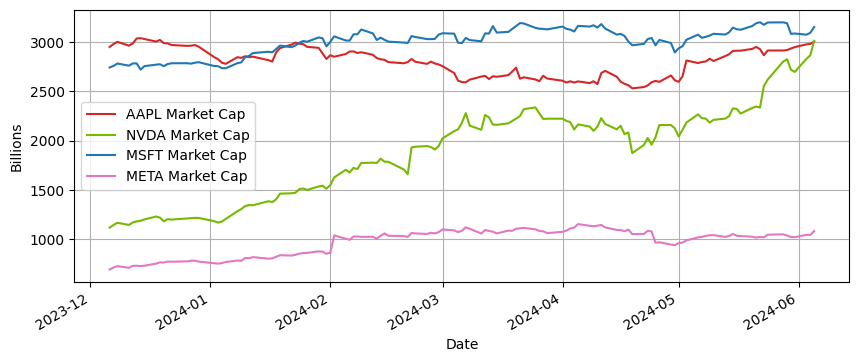

In [130]:
fig, ax = plt.subplots(figsize=(10,4))
df.plot(ax=ax, color=colors, grid=True)
ax.set_ylabel("Billions")

In [238]:
df_long = df.reset_index().melt(id_vars=["Date"], value_name="Market Cap (Billions)")
df_long = df_long.rename(columns={"variable":"Symbol"})

In [247]:
import altair as alt

highlight = alt.selection_point(
    on="pointerover", fields=["Symbol"], nearest=True
)

color_domain = ['AAPL Market Cap', 'NVDA Market Cap', 'MSFT Market Cap', 'META Market Cap']
color_range = colors

base = alt.Chart(df_long).mark_line().encode(
    x="Date:T",
    y="Market Cap (Billions):Q",
    # color="Symbol",
    color=alt.Color('Symbol').scale(domain=color_domain, range=color_range),
    tooltip=[
        alt.Tooltip("Market Cap (Billions):Q", format=",.2f"),
        alt.Tooltip("Symbol:N"),
    ],
)

points = base.mark_circle().encode(
    opacity=alt.value(0)
).add_params(highlight)

lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1), alt.value(3))
)

(points + lines).properties(
    width=700,
    height=300
).configure_axis(
    labelFontSize=12,
    titleFontSize=12
).interactive()

alt.LayerChart(...)